In [52]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

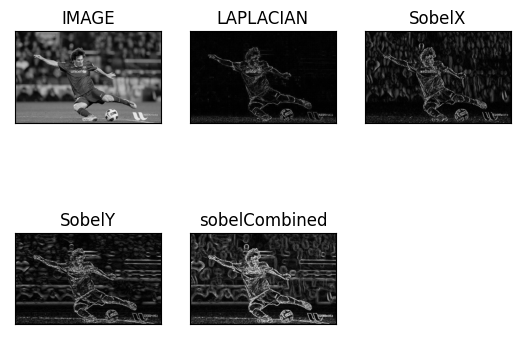

In [53]:
## here we will be seeing image gradients - a gradient is a directional change in the intensity or in the color of the image
## it is basically used for edge detecction - there are various image gradients methods - here we will be seeing three of them
## laplacian derivative - sobel X - sobel Y
## lets start with the laplacian derivative method
## lets first read the image
img = cv.imread("./messi5.jpg", cv.IMREAD_GRAYSCALE)

## to apply laplacian, there is a cv.Laplacian() method
laplacian = cv.Laplacian(img, cv.CV_64F, ksize=1) ## next we need to take the absolute value by using np.absolute()
laplacian = np.uint8(np.absolute(laplacian))

## lets apply sobel X & sobel Y which also called sobel XGradient and sobel YGradient representation
sobelX = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3) ## the third/fourth argument is dx/dy - 1 to use and 0 not to use
sobelY = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))


## we can also combined both of their results via using bitwise_or such as:
sobelCombined = cv.bitwise_or(sobelX, sobelY)
## lets display it
titles = ["IMAGE", "LAPLACIAN", "SobelX", "SobelY", 'sobelCombined']
images = [img, laplacian, sobelX, sobelY, sobelCombined]

for i in range(len(titles)):
    plt.subplot(2, 3, i+1),
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

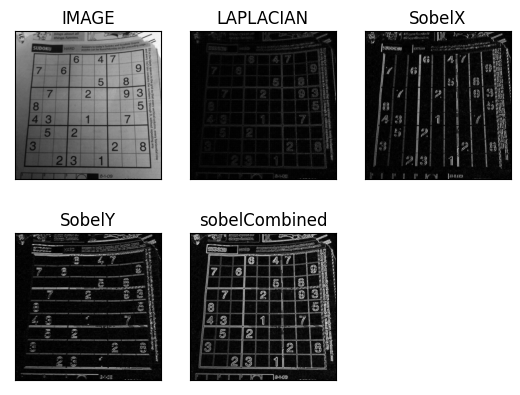

In [54]:
## here we will be seeing image gradients - a gradient is a directional change in the intensity or in the color of the image
## it is basically used for edge detecction - there are various image gradients methods - here we will be seeing three of them
## laplacian derivative - sobel X - sobel Y
## lets start with the laplacian derivative method
## lets first read the image
img = cv.imread("./sudoku.png", cv.IMREAD_GRAYSCALE)

## to apply laplacian, there is a cv.Laplacian() method
laplacian = cv.Laplacian(img, cv.CV_64F, ksize=1) ## next we need to take the absolute value by using np.absolute()
laplacian = np.uint8(np.absolute(laplacian))

## lets apply sobel X & sobel Y which also called sobel XGradient and sobel YGradient representation
sobelX = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3) ## the third/fourth argument is dx/dy - 1 to use and 0 not to use
sobelY = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
# to visualize them on our screen we need to convert them back to 8-bit unsigned integers
sobelX = np.uint8(np.absolute(sobelX)) #cv.convertScaleAbs(sobelX)
sobelY = np.uint8(np.absolute(sobelY)) #cv.convertScaleAbs(sobelY)

## we can also combined both of their results via using bitwise_or such as:
sobelCombined = cv.bitwise_or(sobelX, sobelY)
# we can also combined them using cv.addWeighted with equal weights
# sobelCombined = cv.addWeighted(sobelX, 0.5, sobelY, 0.5, 0)

## lets display it
titles = ["IMAGE", "LAPLACIAN", "SobelX", "SobelY", 'sobelCombined']
images = [img, laplacian, sobelX, sobelY, sobelCombined,]

for i in range(len(titles)):
    plt.subplot(2, 3, i+1),
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray' )
    plt.xticks([]), plt.yticks([])
plt.show

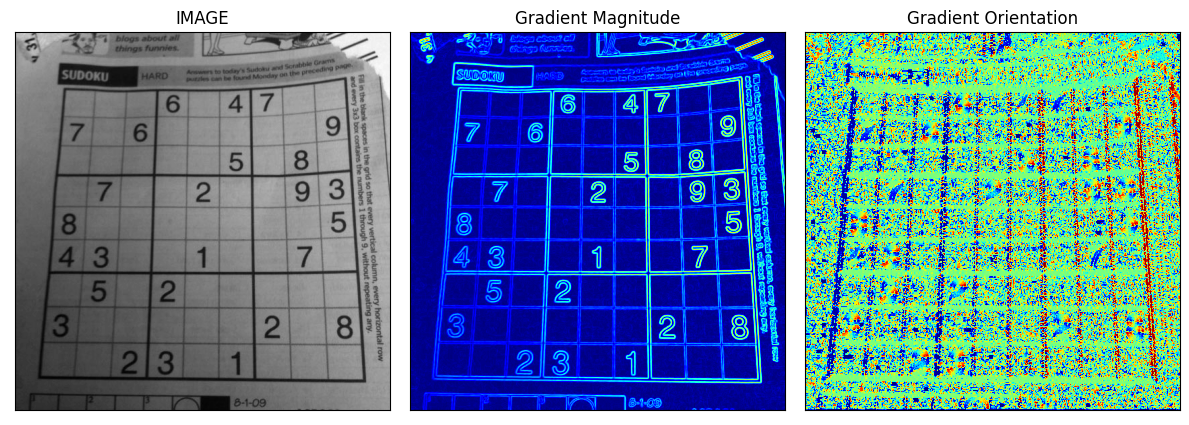

In [58]:
## an extra bonus in the form of gradient direction and gradient magnitude
## gradient magnitude is simply the square-root of the squared gradients in both the x and y direction added together.
# And the gradient orientation is the arc-tangent of the gradients in both the x and y direction.

## first lets read the image
img = cv.imread("./sudoku.png", cv.IMREAD_GRAYSCALE)


## lets apply sobel X & sobel Y to compute the gradient along X & Y axis 
sobelX = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
sobelY = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

## next lets compute the gradient magnitude and gradient orientation
grad_magnitude = np.sqrt((sobelX**2) + (sobelY**2))
grad_orientation = np.arctan2(sobelY, sobelX) * (180/np.pi) % 180
## lets display it
## here we will be using a slightly different approach
(fig, axis) = plt.subplots(1,3, figsize=(12,10))
## ploting the images
axis[0].imshow(img, cmap="gray")
axis[1].imshow(grad_magnitude, cmap='jet')
axis[2].imshow(grad_orientation, cmap='jet')

## ploting the titles
axis[0].set_title("IMAGE")
axis[1].set_title("Gradient Magnitude")
axis[2].set_title("Gradient Orientation")

## getting the x and y-ticks and setting them to 0
for i in range(0,3):
    axis[i].get_xaxis().set_ticks([])
    axis[i].get_yaxis().set_ticks([])
## show the plots
plt.tight_layout()
plt.show()

In [56]:
titles = ["IMAGE", "LAPLACIAN", "SobelX", "SobelY", 'sobelCombined']
jet=[i for i in titles if i in ["SobelX", "SobelY", 'sobelCombined']]
print(jet)

['SobelX', 'SobelY', 'sobelCombined']


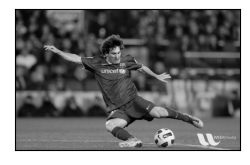

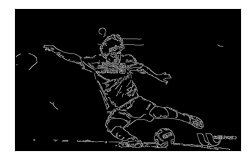

In [63]:
## next we will be seeing the canny edge detector - developed by john F. Canny in 1986, it is
## a multi-stage algorithm used to detect a wide range of edges - the entire process can be 
## broken down into five steps - Noise reduction - Gradient Calculation - Non - maximum suppre-
## ssion - double threshold - Edge tracking by hysteresis
## lets implement it - first thing first, lets read the image
img = cv.imread("./messi5.jpg", cv.IMREAD_GRAYSCALE)

## lets implement canny edge detection using cv.Canny()
edgeDetc = cv.Canny(img, 120, 230) ## second and third arguments are the 
                                    ## T_lower and T_upper thresholds, respectively.
                                     ## Setting these threshold ranges is not always a trivial process.
                                      ## If the threshold range is too wide, then we’ll get many false edges instead of being 
                                       ## about to find just the structure and outline of an object in an image.
                                        ## Similarly, if the threshold range is too tight, we won’t find many edges at all and 
                                         ## could be at risk of missing the structure/outline of the object entirely!
    

## lets display it
titles = ["IMAGE", "CannyEdge"]
images = [img, edgeDetc]

for i in range(len(titles)):
    plt.subplot(1,2, i+1),
    plt.imshow(images[i], cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()
    


In [70]:
## lets use the trackbar to see the effect of different threshold values

img = cv.imread("./messi5.jpg", cv.IMREAD_GRAYSCALE)

cv.namedWindow("CannyEdge")

def finalPixelValue(x):
    print(x)
cv.createTrackbar('thre1', 'CannyEdge', 0, 300, finalPixelValue)
cv.createTrackbar('thre2', 'CannyEdge', 0, 300, finalPixelValue)

## lets display it via using cv.imshow()
while 1:
    cv.imshow('IMAGE', img)
    
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
    thres1 = cv.getTrackbarPos("thre1", "CannyEdge")
    thres2 = cv.getTrackbarPos("thre2", "CannyEdge")

    edgeDetc = cv.Canny(img, thres1, thres2)
    cv.imshow("CannyEdge", edgeDetc)

cv.destroyAllWindows()


6
27
44
55
65
87
104
111
120
132
147
159
163
172
185
194
208
213
219
228
236
242
247
253
256
259
262
265
267
270
272
273
276
279
281
282
283
285
288
289
290
291
292
294
295
296
298
299
300
15
57
66
81
129
137
150
180
195
203
216
237
250
259
270
287
300
